<b> Importing required libraries </b>

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
!conda install beautifulsoup4 --yes
from bs4 import BeautifulSoup
!pip install lxml
import lxml
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

<b> Setting maxcolwidth to 800 for good viewability </b>

In [2]:
pd.set_option('max_colwidth', 800)

<b> Getting the source webpage and assigining the variable source to it and iniatilizing the beautifulsoup object to soup </b>

In [3]:
!wget -q -O 'zipcodes.at.json' https://github.com/zauberware/postal-codes-json-xml-csv/raw/master/data/AT/zipcodes.at.json
print('Data downloaded!')

Data downloaded!


In [4]:
with open('zipcodes.at.json') as json_data:
    austria_data = json.load(json_data)

In [5]:
austria_data
print ('works')

works


In [6]:
austria_data[0]

{'country_code': 'AT',
 'zipcode': '7000',
 'place': 'Eisenstadt',
 'state': 'Burgenland',
 'state_code': '01',
 'province': 'Eisenstadt Stadt',
 'province_code': '101',
 'community': 'Eisenstadt',
 'community_code': '10101',
 'latitude': '47.8457',
 'longitude': '16.5233'}

In [7]:
df = pd.DataFrame(austria_data)

In [8]:
df.head()

,country_code,zipcode,place,state,state_code,province,province_code,community,community_code,latitude,longitude
0,AT,7000,Eisenstadt,Burgenland,01,Eisenstadt Stadt,101,Eisenstadt,10101,47.8457,16.5233
1,AT,7000,Sankt Georgen am Leithagebirge,Burgenland,01,Eisenstadt Stadt,101,Eisenstadt,10101,47.85,16.55
2,AT,7000,Kleinhöflein im Burgenland,Burgenland,01,Eisenstadt Stadt,101,Eisenstadt,10101,47.8415,16.5041
3,AT,7071,Rust,Burgenland,01,Rust Stadt,102,Rust,10201,47.8012,16.6716
4,AT,2443,Loretto,Burgenland,01,Eisenstadt-Umgebung,103,Loretto,10320,47.9156,16.5179


In [9]:
df_vienna = df[df.state_code == '09']

In [10]:
df_vienna.head()

,country_code,zipcode,place,state,state_code,province,province_code,community,community_code,latitude,longitude
18933,AT,1010,"Wien, Innere Stadt",Wien,09,Politischer Bezirk Wien (Stadt),900,Gemeindebezirk Innere Stadt,901,48.2077,16.3705
18934,AT,1020,"Wien, Leopoldstadt",Wien,09,Politischer Bezirk Wien (Stadt),900,Gemeindebezirk Leopoldstadt,902,48.2167,16.4
18935,AT,1030,"Wien, Landstraße",Wien,09,Politischer Bezirk Wien (Stadt),900,Gemeindebezirk Landstrasse,903,48.1981,16.3948
18936,AT,1040,"Wien, Wieden",Wien,09,Politischer Bezirk Wien (Stadt),900,Gemeindebezirk Wieden,904,48.192,16.3671
18937,AT,1050,"Wien, Margareten",Wien,09,Politischer Bezirk Wien (Stadt),900,Gemeindebezirk Margareten,905,48.1865,16.3549


In [11]:
df_vienna.shape

(24, 11)

In [12]:
df_vienna2 = df_vienna[['state', 'place','latitude', 'longitude']]

In [13]:
df_vienna2

,state,place,latitude,longitude
18933,Wien,"Wien, Innere Stadt",48.2077,16.3705
18934,Wien,"Wien, Leopoldstadt",48.2167,16.4
18935,Wien,"Wien, Landstraße",48.1981,16.3948
18936,Wien,"Wien, Wieden",48.192,16.3671
18937,Wien,"Wien, Margareten",48.1865,16.3549
18938,Wien,"Wien, Mariahilf",48.1952,16.3503
18939,Wien,"Wien, Neubau",48.2,16.35
18940,Wien,"Wien, Josefstadt",48.2167,16.35
18941,Wien,"Wien, Alsergrund",48.2333,16.35
18942,Wien,"Wien, Favoriten",48.1521,16.3878


clean data of NaNs

In [14]:
def f(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [15]:
df_vienna2["latitude"] = df["latitude"].apply(f)
df_vienna2["longitude"] = df["longitude"].apply(f)

print(df_vienna2.dtypes)

state         object
place         object
latitude     float64
longitude    float64
dtype: object


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
address = 'Vienna, Austria'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vienna are {}, {}.'.format(longitude, latitude))

The geograpical coordinate of Vienna are 16.3725042, 48.2083537.


In [17]:
# create map of Vienna using latitude and longitude values
map_vienna = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, state, place in zip(df_vienna2['latitude'], df_vienna2['longitude'], df_vienna2['state'], df_vienna2['place']):
    label = '{}, {}'.format(place, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vienna)  
    
map_vienna

In [18]:
CLIENT_ID = 'JBWU13BOHZRXJ0JHGVB0CUI0QKXRS35KSLDCGCKXCNLYZLHO' # your Foursquare ID
CLIENT_SECRET = 'PKO5CYLLADNNGQNFWPWE1DNHADQNBXRE2ABQZBJGPYHT3DMK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JBWU13BOHZRXJ0JHGVB0CUI0QKXRS35KSLDCGCKXCNLYZLHO
CLIENT_SECRET:PKO5CYLLADNNGQNFWPWE1DNHADQNBXRE2ABQZBJGPYHT3DMK


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
vienna_venues = getNearbyVenues(names=df_vienna2['place'],
                                   latitudes=df_vienna2['latitude'],
                                   longitudes=df_vienna2['longitude']
                                  )

Wien, Innere Stadt
Wien, Leopoldstadt
Wien, Landstraße
Wien, Wieden
Wien, Margareten
Wien, Mariahilf
Wien, Neubau
Wien, Josefstadt
Wien, Alsergrund
Wien, Favoriten
Wien, Simmering
Wien, Meidling
Wien, Hietzing
Wien, Penzing
Wien, Rudolfsheim-Fünfhaus
Wien, Ottakring
Wien, Hernals
Wien, Währing
Wien, Döbling
Wien, Brigittenau
Wien, Floridsdorf
Wien, Donaustadt
Wien, Liesing
Wien, Donaustadt


In [21]:
print(vienna_venues.shape)
vienna_venues.head()

(383, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Wien, Innere Stadt",48.2077,16.3705,Stephansplatz,48.208299,16.371880,Plaza
1,"Wien, Innere Stadt",48.2077,16.3705,Stephansdom,48.208626,16.372672,Church
2,"Wien, Innere Stadt",48.2077,16.3705,Graben,48.208915,16.369379,Pedestrian Plaza
3,"Wien, Innere Stadt",48.2077,16.3705,COS,48.209359,16.371591,Clothing Store
4,"Wien, Innere Stadt",48.2077,16.3705,Kärntner Straße,48.207002,16.371795,Pedestrian Plaza


In [22]:
vienna_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Wien, Alsergrund",30,30,30,30,30,30
"Wien, Brigittenau",16,16,16,16,16,16
"Wien, Donaustadt",8,8,8,8,8,8
"Wien, Döbling",11,11,11,11,11,11
"Wien, Favoriten",7,7,7,7,7,7
"Wien, Floridsdorf",7,7,7,7,7,7
"Wien, Hernals",8,8,8,8,8,8
"Wien, Hietzing",2,2,2,2,2,2
"Wien, Innere Stadt",30,30,30,30,30,30


In [23]:
print('There are {} uniques categories.'.format(len(vienna_venues['Venue Category'].unique())))

There are 126 uniques categories.


In [24]:
# one hot encoding
vienna_onehot = pd.get_dummies(vienna_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vienna_onehot['Neighborhood'] = vienna_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [vienna_onehot.columns[-1]] + list(vienna_onehot.columns[:-1])
vienna_onehot = vienna_onehot[fixed_columns]

vienna_onehot.head()

,Neighborhood,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bakery,Bar,Beer Garden,Bike Shop,Bistro,Bookstore,Boutique,Breakfast Spot,Bulgarian Restaurant,Burger Joint,Bus Stop,Butcher,Café,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Cosmetics Shop,Creperie,Cupcake Shop,Czech Restaurant,Diner,Doner Restaurant,Drugstore,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food,Food & Drink Shop,Food Truck,Furniture / Home Store,Gastropub,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Middle Eastern Restaurant,Modern European Restaurant,Mountain,Movie Theater,Museum,Office,Organic Grocery,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pharmacy,Pizza Place,Planetarium,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Record Shop,Restaurant,Road,Scandinavian Restaurant,Scenic Lookout,Shopping Mall,Shopping Plaza,Smoke Shop,Soccer Field,Soup Place,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Storage Facility,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Trail,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Winery,Yoga Studio
0,"Wien, Innere Stadt",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Wien, Innere Stadt",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Wien, Innere Stadt",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Wien, Innere Stadt",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Wien, Innere Stadt",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
vienna_onehot.shape

(383, 127)

In [26]:
vienna_grouped = vienna_onehot.groupby('Neighborhood').mean().reset_index()
vienna_grouped

,Neighborhood,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bakery,Bar,Beer Garden,Bike Shop,Bistro,Bookstore,Boutique,Breakfast Spot,Bulgarian Restaurant,Burger Joint,Bus Stop,Butcher,Café,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Cosmetics Shop,Creperie,Cupcake Shop,Czech Restaurant,Diner,Doner Restaurant,Drugstore,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food,Food & Drink Shop,Food Truck,Furniture / Home Store,Gastropub,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Middle Eastern Restaurant,Modern European Restaurant,Mountain,Movie Theater,Museum,Office,Organic Grocery,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pharmacy,Pizza Place,Planetarium,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Record Shop,Restaurant,Road,Scandinavian Restaurant,Scenic Lookout,Shopping Mall,Shopping Plaza,Smoke Shop,Soccer Field,Soup Place,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Storage Facility,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Trail,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Winery,Yoga Studio
0,"Wien, Alsergrund",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.00,0.000000,0.000,0.000000,0.066667,0.000000,0.033333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.100000,0.033333,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333
1,"Wien, Brigittenau",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.125000,0.000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.187500,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Wien, Donaust

In [27]:
vienna_grouped.shape

(23, 127)

In [28]:
num_top_venues = 5

for hood in vienna_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = vienna_grouped[vienna_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Wien, Alsergrund----
            venue  freq
0     Supermarket  0.10
1             Pub  0.07
2            Café  0.07
3    Burger Joint  0.07
4  Ice Cream Shop  0.03


----Wien, Brigittenau----
            venue  freq
0     Supermarket  0.19
1        Bus Stop  0.19
2           Plaza  0.12
3  Ice Cream Shop  0.06
4    Tennis Court  0.06


----Wien, Donaustadt----
                   venue  freq
0            Supermarket  0.50
1             Restaurant  0.25
2      Indian Restaurant  0.25
3        Organic Grocery  0.00
4  Portuguese Restaurant  0.00


----Wien, Döbling----
                 venue  freq
0  Austrian Restaurant  0.27
1             Wine Bar  0.18
2           Restaurant  0.09
3                 Park  0.09
4            Gastropub  0.09


----Wien, Favoriten----
                venue  freq
0          Smoke Shop  0.14
1                Park  0.14
2  Italian Restaurant  0.14
3  Athletics & Sports  0.14
4       Shopping Mall  0.14


----Wien, Floridsdorf----
         venue  freq
0  Su

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = vienna_grouped['Neighborhood']

for ind in np.arange(vienna_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vienna_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Wien, Alsergrund",Supermarket,Pub,Café,Burger Joint,Yoga Studio,Sushi Restaurant,Pharmacy,Pizza Place,Hotel,Cocktail Bar
1,"Wien, Brigittenau",Bus Stop,Supermarket,Plaza,Bakery,Restaurant,Soup Place,Metro Station,Tennis Court,Ice Cream Shop,Hostel
2,"Wien, Donaustadt",Supermarket,Indian Restaurant,Restaurant,Yoga Studio,Fast Food Restaurant,Gastropub,Furniture / Home Store,Food Truck,Food & Drink Shop,Food
3,"Wien, Döbling",Austrian Restaurant,Wine Bar,Light Rail Station,Food,Park,Restaurant,Gastropub,Winery,Drugstore,Electronics Store
4,"Wien, Favoriten",Shopping Mall,Park,Italian Restaurant,Grocery Store,Metro Station,Athletics & Sports,Smoke Shop,Food Truck,Food & Drink Shop,Food


In [31]:
vienna_grouped_clustering = vienna_grouped.drop('Neighborhood', 1)

In [32]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [33]:
def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [34]:
max_range = 20 # Maximum range of clusters

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range):
    
    # Run k-means clustering
    vgc = vienna_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(vgc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(vgc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

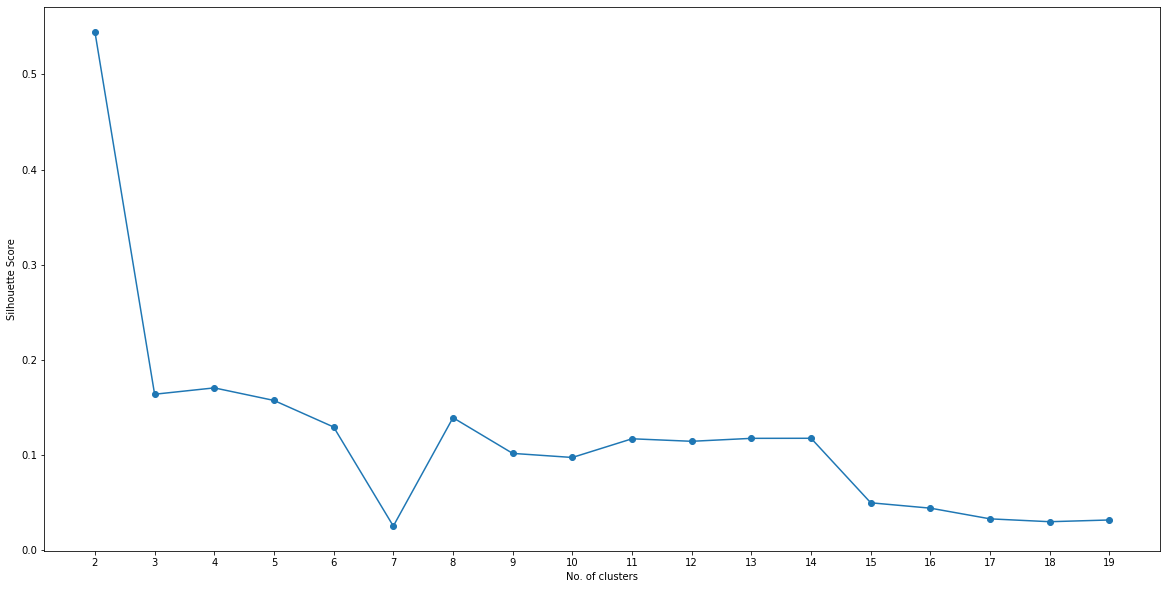

In [36]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [37]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

2

In [38]:
# set number of clusters
kclusters = opt
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vienna_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [39]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vienna_merged = df_vienna2

# merge vienna_grouped with df_vienna2 to add latitude/longitude for each neighborhood
vienna_merged = vienna_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='place')



In [40]:
vienna_merged.head(21) # check the last columns!

,state,place,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18933,Wien,"Wien, Innere Stadt",48.2077,16.3705,0,Cocktail Bar,Pedestrian Plaza,Boutique,Hotel,Plaza,Bar,Electronics Store,Shopping Plaza,Clothing Store,Restaurant
18934,Wien,"Wien, Leopoldstadt",48.2167,16.4000,0,Theme Park Ride / Attraction,Restaurant,Hotel,Beer Garden,Museum,Lounge,Gastropub,Food & Drink Shop,Theme Park,Sports Bar
18935,Wien,"Wien, Landstraße",48.1981,16.3948,0,Café,Hotel,Italian Restaurant,Gourmet Shop,Ice Cream Shop,Gym,Pizza Place,Pub,Restaurant,Gastropub
18936,Wien,"Wien, Wieden",48.1920,16.3671,0,Restaurant,Ice Cream Shop,Café,Hotel,Asian Restaurant,Organic Grocery,Modern European Restaurant,Coffee Shop,Diner,Pizza Place
18937,Wien,"Wien, Margareten",48.1865,16.3549,0,Indian Restaurant,Supermarket,Italian Restaurant,Hotel,Austrian Restaurant,Bar,Park,Plaza,Portuguese Restaurant,Restaurant
18938,Wien,"Wien, Mariahilf",48.1952,16.3503,0,Bar,Ice Cream Shop,Indian Restaurant,Record Shop,Coffee Shop,Road,Cocktail Bar,Clothing Store,Church,Café
18939,Wien,"Wien, Neubau",48.2000,16.3500,0,Clothing Store,Hotel,Austrian Restaurant,Bar,Paper / Office Supplies Store,Bistro,Church,Comedy Club,Cosmetics Shop,Men's Store
18940,Wien,"Wien, Josefstadt",48.2167,16.3500,0,Café,Restaurant,Supermarket,Pub,Coffee Shop,Bar,Park,Burger Joint,Breakfast Spot,Scandinavian Restaurant
18941,Wien,"Wien, Alsergrund",48.2333,16.3500,0,Supermarket,Pub,Café,Burger Joint,Yoga Studio,Sushi Restaurant,Pharmacy,Pizza Place,Hotel,Cocktail Bar
18942,Wien,"Wien, Favoriten",48.1521,16.3878,0,Shopping Mall,Park,Italian Restaurant,Grocery Store,Metro Station,Athletics & Sports,Smoke Shop,Food Truck,Food & Drink Shop,Food


In [41]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vienna_merged['latitude'], vienna_merged['longitude'], vienna_merged['place'], vienna_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters